In [1]:
from scipy.optimize import linprog, minimize, linear_sum_assignment
import numpy as np
import pulp as pp
import cvxpy as cp
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Inter"
plt.style.use("ggplot")

In [17]:
c = [-2, -3, 5]
A_ub = [[-2, 5, -1], [1, 3, 1]]
b_ub = [-10, 12]
A_eq = [[1, 1, 1]]
b_eq = 7

bounds = 3 * [(0, None)]
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
print(f"优化结果：{-res.fun}")
print(f"参数取值：{list(res.x)}")

优化结果：14.571428571428571
参数取值：[6.428571428571429, 0.5714285714285712, 0.0]


In [23]:
c = [2, 3, 1]
A_ub = [[2, -5, 1], [1, 3, 1]]
b_ub = [10, 12]
A_eq = [1, 1, 1]
b_eq = 7

prob = pp.LpProblem("max_z", sense=pp.LpMaximize)
x = [
    pp.LpVariable(f"x{i}", lowBound=0, upBound=None, cat=pp.LpInteger)
    for i in [1, 2, 3]
]
prob += pp.lpDot(c, x)

prob += pp.lpDot(A_ub[0], x) >= 10
prob += pp.lpDot(A_ub[1], x) <= 12
prob += pp.lpDot(A_eq, x) == 7

prob.solve()

print(f"优化结果：{pp.value(prob.objective)}")
print(f"参数取值：{[pp.value(var) for var in x]}")

优化结果：14.0
参数取值：[7.0, 0.0, 0.0]


In [29]:
def fun(x):
    return (
        4
        + 0.3 * x[0]
        + 0.0007 * x[0] ** 2
        + 3
        + 0.32 * x[1]
        + 0.0004 * x[1] ** 2
        + 3.5
        + 0.3 * x[2]
        + 0.00045 * x[2] ** 2
    )


def constraints():
    return ({"type": "eq", "fun": lambda x: x[0] + x[1] + x[2] - 700},)


bounds = [(100, 200), (120, 250), (150, 300)]

constraints = constraints()
x0 = np.array([150, 250, 20])
res = minimize(fun, x0, method="SLSQP", constraints=constraints, bounds=bounds)
print(f"优化结果：{res.fun}")
print(f"参数取值：{res.x.tolist()}")

优化结果：305.96739130439465
参数取值：[176.08675476864983, 250.0, 273.91324523135023]


In [41]:
from sko.GA import GA


def func(x):
    return (
        4
        + 0.3 * x[0]
        + 0.0007 * x[0] ** 2
        + 3
        + 0.32 * x[1]
        + 0.0004 * x[1] ** 2
        + 3.5
        + 0.3 * x[2]
        + 0.00045 * x[2] ** 2
    )


def constraints_eq():
    return lambda x: x[0] + x[1] + x[2] - 700


constraints_eq = constraints_eq()

ga = GA(
    func=func,
    n_dim=3,
    size_pop=200,
    max_iter=500,
    lb=[100, 120, 150],
    ub=[200, 250, 300],
    constraint_eq=[constraints_eq],
)
best_x, best_y = ga.run()
print(f"优化结果：{best_y}")
print(f"参数取值：{best_x}")

优化结果：[306.32260079]
参数取值：[185.02432842 240.18202298 274.79364859]


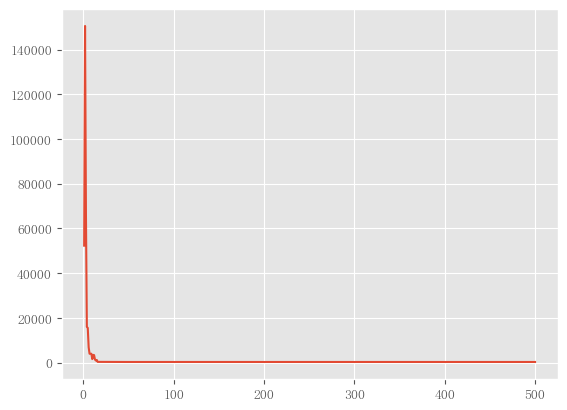

In [44]:
history = ga.all_history_Y
func_list = [min(i) for i in history]
plt.plot(np.arange(1, 501), func_list)
plt.show()

$$
\min f(x) = \sum_{i = 1}^6 \sum_{j = 1}^2 m_{ij} \sqrt{(x_j - a_i)^2 + (y_j - b_i)^2} \\
s.t.
\begin{cases}
\sum_{i = 1}^6 m_{ij} \le 20,\ j = 1,\ 2 \\
\sum_{j = 1}^2 m_{ij} = d_i,\ i = 1,\ 2,\ \dots,\ 6 \\
m_{ij} \ge 0 \\
x_1,\ x_2,\ y_1,\ y_2 \ge 0
\end{cases}

In [57]:
import numpy as np
from scipy.optimize import minimize


def func(x):
    s = 0
    j = 3
    a = [1.25, 8.75, 0.5, 5.75, 3, 7.25]
    b = [1.25, 0.75, 4.75, 5, 6.5, 7.25]
    for i in range(6):
        s += x[j + 1] * np.sqrt((x[0] - a[i]) ** 2 + (x[1] - b[i]) ** 2) + x[
            j + 2
        ] * np.sqrt((x[2] - a[i]) ** 2 + (x[3] - b[i]) ** 2)
        j += 2

    return s


constraints = (
    {"type": "eq", "fun": lambda x: x[4] + x[10] - 3},
    {"type": "eq", "fun": lambda x: x[5] + x[11] - 5},
    {"type": "eq", "fun": lambda x: x[6] + x[12] - 4},
    {"type": "eq", "fun": lambda x: x[7] + x[13] - 7},
    {"type": "eq", "fun": lambda x: x[8] + x[14] - 6},
    {"type": "eq", "fun": lambda x: x[9] + x[15] - 11},
    {"type": "ineq", "fun": lambda x: x[4] + x[5] + x[6] + x[7] + x[8] + x[9] - 20},
    {
        "type": "ineq",
        "fun": lambda x: x[10] + x[11] + x[12] + x[13] + x[14] + x[15] - 20,
    },
)

bounds = 16 * ((0, None),)
x0 = np.ones(16)
res = minimize(func, x0, method="SLSQP", constraints=constraints, bounds=bounds)
res.x

array([9.16294620e-01, 4.83173448e+00, 2.42648217e+00, 5.71973525e+00,
       2.55555814e+00, 2.63354370e-07, 1.40263756e-11, 2.02742035e-11,
       6.00020329e+00, 1.10001202e+01, 1.04663983e+00, 5.46962983e+00,
       5.90466927e+00, 7.57906128e+00, 7.51622017e-13, 3.25639535e-12])

In [60]:
c = np.array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, -1, 1, -1, 1])
A_eq = np.array(
    [
        [20000, 10000, 20000, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [-1, 1, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, -1, 1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1],
    ]
)
b_eq = np.array([[300000, 3, 3, 0, 3, 3]])
bounds = np.array(15 * [(0, 10)])
res = linprog(c, None, None, A_eq, b_eq, bounds)
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -5.250375
              x: [ 3.750e+00  7.500e+00 ...  4.500e+00  0.000e+00]
            nit: 4
          lower:  residual: [ 3.750e+00  7.500e+00 ...  4.500e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          upper:  residual: [ 6.250e+00  2.500e+00 ...  5.500e+00
                              1.000e+01]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
                 marginals: [-3.750e-05 -1.250e-01  1.250e-01  7.500e-01
                              1.000e+00  1.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_d

In [14]:
print(cp.installed_solvers())

['CLARABEL', 'COPT', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIP', 'SCIPY', 'SCS']


In [65]:
T = np.array([[25, 29, 31, 42], [39, 38, 26, 20], [34, 27, 28, 40], [24, 42, 36, 23]])
row_ind, col_ind = linear_sum_assignment(T)
print(row_ind)  # 行位置
print(col_ind)  # 列位置
print(T[row_ind, col_ind])
print(T[row_ind, col_ind].sum())

[0 1 2 3]
[0 2 1 3]
[25 26 27 23]
101


$$
\min z = 40 x_1 + 90 x_2 \\
s.t.
\begin{cases}
9 x_1 + 7 x_2 \le 56 \\
7 x_1 + 20 x_2 \ge 70 \\
x_1,\ x_2 \ge 0 为整数
\end{cases}

In [71]:
c = np.array([40, 90])
A = np.array([[9, 7], [-7, -20]])
b = np.array([56, -70])
x = cp.Variable(2, integer=True)
obj = cp.Minimize(x @ c)
cons = [A @ x <= b, x >= 0]  
prob = cp.Problem(obj, cons)
prob.solve(solver=cp.ECOS_BB)
print(f"优化结果：{prob.value}")
print(f"参数取值：{x.value}")

优化结果：349.999999698103
参数取值：[2. 3.]


<img src="https://leafalice-image.oss-cn-hangzhou.aliyuncs.com/img/2024-04-04%2F61a0b7cf7733d449808067dabd3718cb--00c9--image-20240404135319945.png" alt="image-20240404135319945" style="zoom: 67%;" />

$$
\max z_1 = \sum_{j = 1}^7 l_j (x_{1j} + x_{2j}) \\ 
s.t. 
\begin{cases}
\sum_{i = 1}^2 x_{ij} \le a_j, \quad j = 1,\ 2,\ \dots,\ 7 \\ 
\sum_{j = 1}^7 l_j x_{ij} \le 1020, \quad i = 1,\ 2 \\
\sum_{j = 1}^7 w_j x_{ij} \le 40000, \quad i = 1,\ 2 \\
\sum_{j = 5}^7 l_j (x_{1j} + x_{2j}) \le 302.7 \\
x_{ij} \ge 0 且为整数, \quad i = 1,\ 2 \quad j = 1,\ 2,\ \dots,\ 7
\end{cases}

In [111]:
import cvxpy as cp
import numpy as np


l = np.array([48.7, 52.0, 61.3, 72.0, 48.7, 52.0, 64.0])
w = np.array([2000, 3000, 1000, 500, 4000, 2000, 1000])
a = np.array([8, 7, 9, 6, 6, 4, 8])


x = cp.Variable((2, 7), integer=True)


z1 = cp.sum(cp.multiply(l, (x[0, :] + x[1, :])))
objective = cp.Maximize(z1)


constraints = [cp.sum(x[:, j]) <= a[j] for j in range(7)]
constraints += [l @ x[i, :] <= 1020 for i in range(2)]
constraints += [w @ x[i, :] <= 40000 for i in range(2)]
constraints += [l[4:] @ (x[0, 4:] + x[1, 4:]) <= 302.7]


problem = cp.Problem(objective, constraints)
problem.solve(solver="COPT")


print("Optimal objective value:", problem.value)
print("Optimal solution:")
print(x.value)

Optimal objective value: 2039.9
Optimal solution:
[[ 11.   0.  17. -12.   3.  -8.   9.]
 [ -3.   7.  -8.  18.  -5.  12.  -6.]]


In [70]:
l = np.array([48.7, 52.0, 61.3, 72.0, 48.7, 52.0, 64.0])
w = np.array([2000, 3000, 1000, 500, 4000, 2000, 1000])
a = np.array([8, 7, 9, 6, 6, 4, 8])

x1 = cp.Variable(shape=7, integer=True)
x2 = cp.Variable(shape=7, integer=True)

obj = cp.Maximize((x1 + x2) @ l)
con = [
    cp.sum(x1 + x2, axis=0) <= a,
    l @ x1 <= 1020,
    l @ x2 <= 1020,
    w @ x1 <= 40000,
    w @ x2 <= 40000,
    l[4:7] @ (x1[4:7] + x2[4:7]) <= 302.7,
]
prob = cp.Problem(obj, con)

prob.solve(solver="COPT")

print(f"优化结果：{prob.value}")
print(f"x1 取值：{x1.value}")
print(f"x2 取值：{x2.value}")

优化结果：2039.8999999999985
x1 取值：[  0.   0.  43. -27.   0.  -6.  10.]
x2 取值：[  -1.  101. -402.  285.   -1.    1.   -1.]


$$
\min z = \sum_{i = 1}^5 \sum_{j = 1}^5 c_{ij} x_{ij}, \\
s.t. 
\begin{cases}
\sum_{j = 1}^5 x_{ij} = 1,\quad i = 1,\ 2,\ \dots,\ 5 \\
\sum_{i = 1}^5 x_{ij} = 1,\quad j = 1,\ 2,\ \dots,\ 5 \\
x_{ij} = 0,\ 1 \quad i,\ j = 1,\ 2,\ \dots,\ 5
\end{cases}

In [73]:
c = np.array(
    [
        [4, 8, 7, 15, 12],
        [7, 9, 17, 14, 10],
        [6, 9, 12, 8, 7],
        [6, 7, 14, 6, 10],
        [6, 9, 12, 10, 6],
    ]
)
x = cp.Variable((5, 5), integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c, x)))
con = [
    0 <= x,
    x <= 1,
    cp.sum(x, axis=0) == 1,
    cp.sum(x, axis=1) == 1,
]
prob = cp.Problem(obj, con)
prob.solve(solver="COPT")
print(f"最优结果：{prob.value}")
print(f"参数取值：\n{x.value}")

最优结果：34.0
参数取值：
[[ 0. -0.  1. -0. -0.]
 [ 0.  1. -0. -0. -0.]
 [ 1. -0. -0. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]


In [75]:
c = np.array([160, 130, 220, 170, 140, 130, 190, 150, 190, 200, 230])

left = np.array(
    [
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    ]
)

right_min = np.array([30, 70, 10, 10])
right_max = np.array([80, 140, 30, 50])
x = cp.Variable(11)
obj = cp.Minimize(c @ x)
con = [
    x >= 0,
    left @ x <= right_max,
    left @ x >= right_min,
    cp.sum(x[0:4]) == 50,
    cp.sum(x[4:8]) == 60,
    cp.sum(x[8:11]) == 50,
]
prob = cp.Problem(obj, con)
prob.solve(solver="COPT")
print(f"最优结果：{prob.value}")
print(f"参数取值：{x.value}")

最优结果：24400.0
参数取值：[ 0. 50.  0.  0.  0. 50.  0. 10. 40.  0. 10.]


$$
c(x) = 
\begin{cases}
10x \quad (0 \le x \le 500) \\
1000 + 8x \quad (500 \le x \le 1000) \\
3000 + 6x \quad (1000 \le x \le 1500)
\end{cases} \\
\max z = 4.8 x_{11} + 5.6 x_{12} + 4.8 x_{21} + 5.6 x_{22} - c(x) \\
s.t.
\begin{cases}
x_{11} + x_{12} \le 500 + x \\
x_{21} + x_{22} \le 1000 \\
x \le 1500 \\
-x_{11} + x_{21} \le 0 \\
-2 x_{12} + 3 x_{22} \le 0 \\
x_{11},\ x_{12},\ x_{21},\ x_{22}, \quad x \ge 0 \\
z_1 \le y_1, \quad z_2 \le y_1 + y_2, \quad z_3 \le y_2 + y_3, \quad z_4 \le y_3 \\
z_1 + z_2 + z_3 + z_4 = 1, \quad z_1,\ z_2,\ z_3,\ z_4 \ge 0 \\
y_1 + y_2 + y_3 = 1, \quad y_1,\ y_2,\ y_3 = 0,\ 1 \\
c(x) = 5000 z_2 + 9000 z_3 + 12000 z_4 
\end{cases}

最优结果：5000.0
参数取值：[  -0. 1500.    0. 1000.]
